Webscraping data of IMDB top movies and analysing the same

In [2]:
#importing the packages
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:

def get_movie_data(start_number=1):
    """
    Fetches movie data starting from the provided movie number from IMDb's top 1000 movies.
    """
    # Setting the URL for the first page if start_number is 1
    if start_number == 1:
        url = "https://www.imdb.com/search/title/?count=100&groups=top_1000&sort=user_rating"
    else:
        url = f"https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start={start_number}&ref_=adv_nxt"
    
    # Fetch the web content through requests and store it in response, and create a variable 'soup' with parsed version of data
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find all movie containers
    movie_containers = soup.find_all('div', class_='lister-item mode-advanced')
    
    # Extract movie details from each container
    movie_data = []
    for movie in movie_containers:
        # Movie Title
        title = movie.h3.a.text
        
        # Movie Year
        year = movie.h3.find('span', class_='lister-item-year').text
        
        # IMDb Rating
        imdb_rating = float(movie.strong.text)
        
        # MetaScore
        m_score = movie.find('span', class_='metascore')
        metascore = int(m_score.text) if m_score else None
        
        # Votes
        votes = movie.find('span', attrs={'name': 'nv'})['data-value']
        
        # Gross revenue
        gross_list = movie.find_all('span', attrs={'name': 'nv'})
        gross = gross_list[1]['data-value'] if len(gross_list) > 1 else None
        
        # Director and Stars
        director_stars = movie.find('p', class_='').find_all('a')
        director = director_stars[0].text
        stars = ", ".join([star.text for star in director_stars[1:]])
        
        # Append to movie data list
        movie_data.append([title, year, imdb_rating, metascore, votes, gross, director, stars])
    
    return movie_data

# Fetch data for all 10 pages (1000 movies)
all_movie_data = []
for start_number in range(1, 1001, 100):
    all_movie_data.extend(get_movie_data(start_number))

# Convert to a DataFrame for better representation
df = pd.DataFrame(all_movie_data, columns=['Title', 'Year', 'IMDb Rating', 'Metascore', 'Votes', 'Gross', 'Director', 'Stars'])

# Add a serial number column
df.insert(0, 'Ranking', range(1, 1001))

# Save to CSV or Excel if required
#path = r"D:\2_WorkTrack\0 Data\Datasets\IMDb_Top_1000_Movies.csv"
#df1.to_csv(path, index=False)

#print(f"DataFrame has been saved to {path}")


In [4]:
df.head()

,Ranking,Title,Year,IMDb Rating,Metascore,Votes,Gross,Director,Stars
0,1,The Shawshank Redemption,(1994),9.3,82.0,2774511,"28,341,469",Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi..."
1,2,The Godfather,(1972),9.2,100.0,1931421,"134,966,411",Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke..."
2,3,The Dark Knight,(2008),9.0,84.0,2750397,"534,858,444",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M..."
3,4,Schindler's List,(1993),9.0,95.0,1396695,"96,898,818",Steven Spielberg,"Liam Neeson, Ralph Fiennes, Ben Kingsley, Caro..."
4,5,12 Angry Men,(1957),9.0,97.0,823110,"4,360,000",Sidney Lumet,"Henry Fonda, Lee J. Cobb, Martin Balsam, John ..."


In [5]:
df.tail()

,Ranking,Title,Year,IMDb Rating,Metascore,Votes,Gross,Director,Stars
995,996,Un long dimanche de fiançailles,(2004),7.6,76.0,74981,"6,167,817",Jean-Pierre Jeunet,"Audrey Tautou, Gaspard Ulliel, Jodie Foster, D..."
996,997,Philomena,(2013),7.6,77.0,102303,"37,707,719",Stephen Frears,"Judi Dench, Steve Coogan, Sophie Kennedy Clark..."
997,998,Shine,(1996),7.6,87.0,55568,"35,811,509",Scott Hicks,"Geoffrey Rush, Armin Mueller-Stahl, Justin Bra..."
998,999,The Invisible Man,(1933),7.6,87.0,37793,None,James Whale,"Claude Rains, Gloria Stuart, William Harrigan,..."
999,1000,Celda 211,(2009),7.6,NaN,69446,None,Daniel Monzón,"Luis Tosar, Alberto Ammann, Antonio Resines, M..."


In [6]:
df.isnull().sum()

Ranking          0
Title            0
Year             0
IMDb Rating      0
Metascore      156
Votes            0
Gross          162
Director         0
Stars            0
dtype: int64

In [7]:
# removing the index column

print(df.to_string(index=False))


 Ranking                                                                Title         Year  IMDb Rating  Metascore   Votes       Gross                         Director                                                                                                                                                                                                                                          Stars
       1                                             The Shawshank Redemption       (1994)          9.3       82.0 2774511  28,341,469                   Frank Darabont                                                                                                                                                                                        Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler
       2                                                        The Godfather       (1972)          9.2      100.0 1931421 134,966,411             Francis Ford Coppola                   

In [8]:
# write the data to a csv file
df.to_csv(r"D:\2_WorkTrack\0_Data\Datasets\imdb_movies1000.csv", index=False)


In [9]:
print(df['Year'].dtype)
print(df['Gross'].dtype)
print(df['Votes'].dtype)

object
object
object


In [10]:
df['Year'] = df['Year'].astype(str)
df['Gross'] = df['Gross'].astype(str)
df['Votes'] = df['Votes'].astype(str)

In [11]:
df['Year'] = df['Year'].str.extract('(\d+)')


In [12]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year


In [13]:
df['Gross'] = df['Gross'].str.replace(',', '').str.extract('(\d+)').astype(float)
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)



In [14]:
df.head()

,Ranking,Title,Year,IMDb Rating,Metascore,Votes,Gross,Director,Stars
0,1,The Shawshank Redemption,1994,9.3,82.0,2774511,28341469.0,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi..."
1,2,The Godfather,1972,9.2,100.0,1931421,134966411.0,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke..."
2,3,The Dark Knight,2008,9.0,84.0,2750397,534858444.0,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M..."
3,4,Schindler's List,1993,9.0,95.0,1396695,96898818.0,Steven Spielberg,"Liam Neeson, Ralph Fiennes, Ben Kingsley, Caro..."
4,5,12 Angry Men,1957,9.0,97.0,823110,4360000.0,Sidney Lumet,"Henry Fonda, Lee J. Cobb, Martin Balsam, John ..."


In [15]:
# Importing analysis packages
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df.to_csv(r"D:\2_WorkTrack\0_Data\Datasets\imdb_movies1000.csv", index=False)


In [17]:
movies_df = df

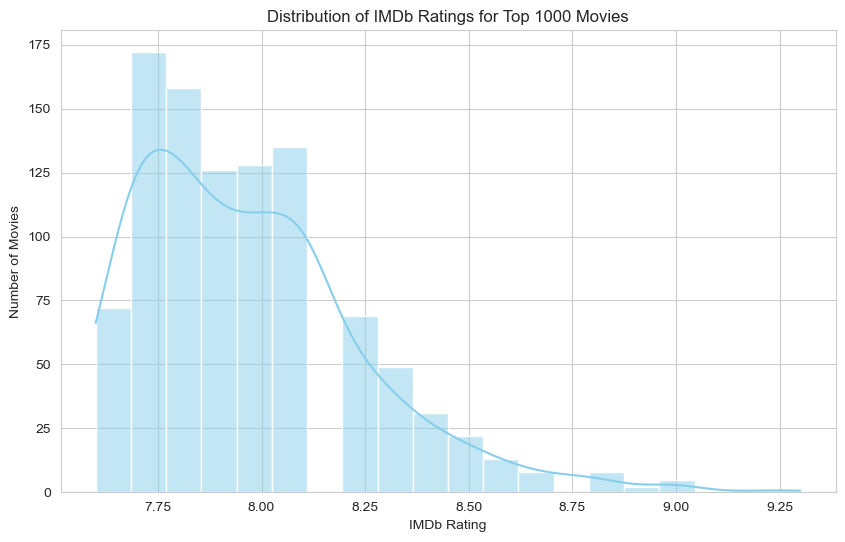

In [18]:
#Distribution of IMDB ratings

# Set style
sns.set_style("whitegrid")

# Plotting the distribution of IMDb Ratings
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['IMDb Rating'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of IMDb Ratings for Top 1000 Movies')
plt.xlabel('IMDb Rating')
plt.ylabel('Number of Movies')
plt.show()


Most movies in the top 1000 list have ratings between 7.5 and 8.5. There are very few movies with ratings above 9, indicating that achieving such a high rating is rare and exceptional.

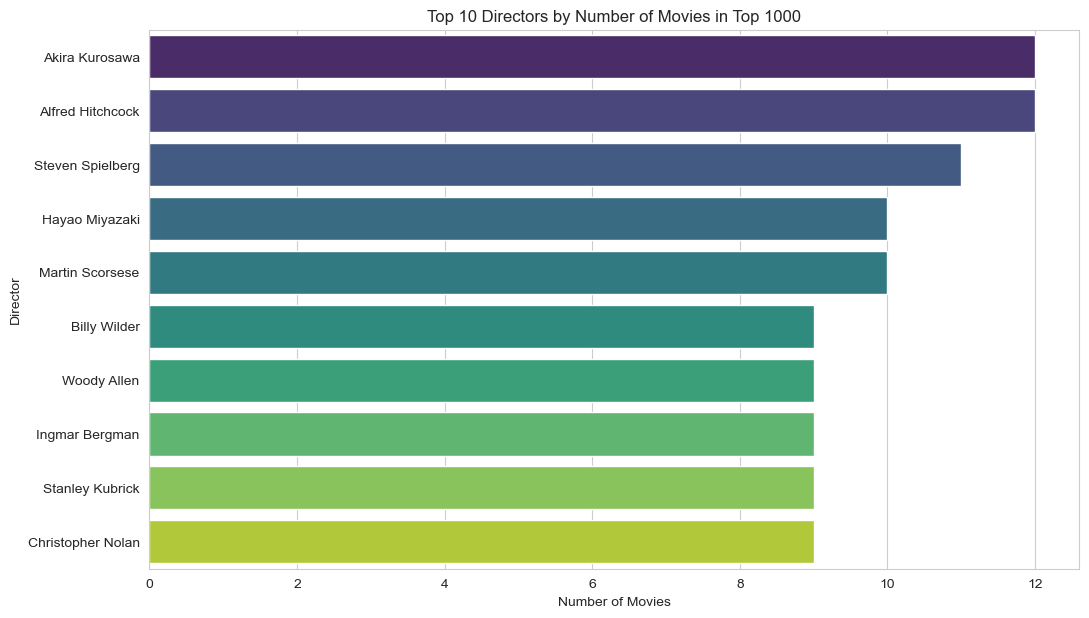

In [19]:
# Finding the top directors by number of movies they have in the top 1000
top_directors = movies_df['Director'].value_counts().head(10)

# Plotting the top directors
plt.figure(figsize=(12, 7))
sns.barplot(x=top_directors.values, y=top_directors.index, palette="viridis")
plt.title('Top 10 Directors by Number of Movies in Top 1000')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()


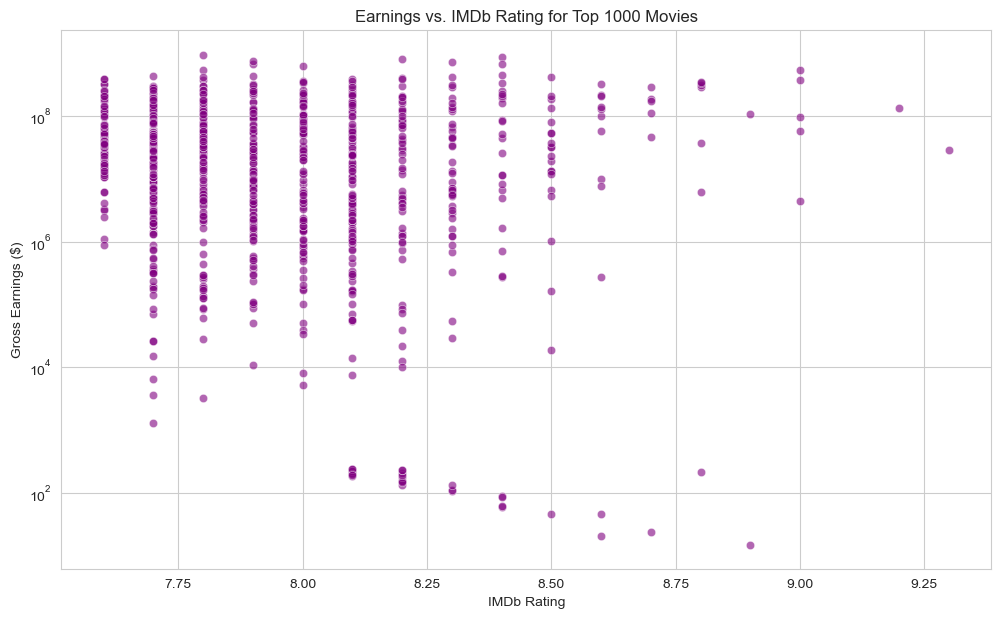

In [20]:
# Plotting Gross earnings vs. IMDb Rating
plt.figure(figsize=(12, 7))
sns.scatterplot(x=movies_df['IMDb Rating'], y=movies_df['Gross'], alpha=0.6, color='purple')
plt.title('Earnings vs. IMDb Rating for Top 1000 Movies')
plt.xlabel('IMDb Rating')
plt.ylabel('Gross Earnings ($)')
plt.yscale('log')  # Using a log scale for better visualization of earnings
plt.show()


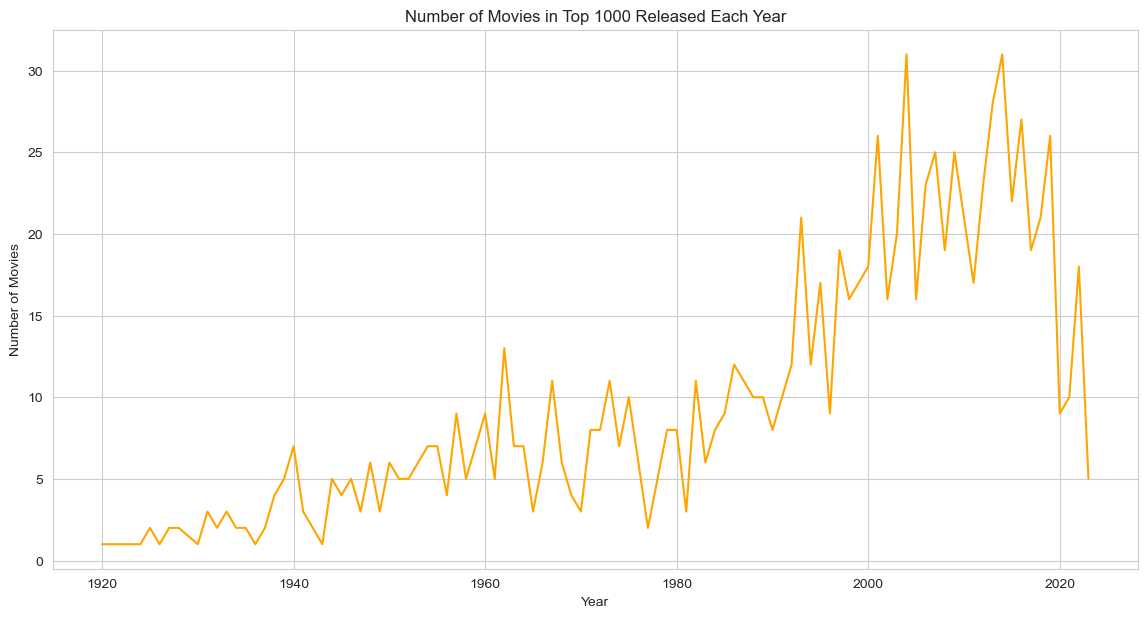

In [21]:
# Counting the number of movies released each year
movies_per_year = movies_df['Year'].value_counts().sort_index()

# Plotting the number of movies released each year
plt.figure(figsize=(14, 7))
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values, color='orange')
plt.title('Number of Movies in Top 1000 Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()


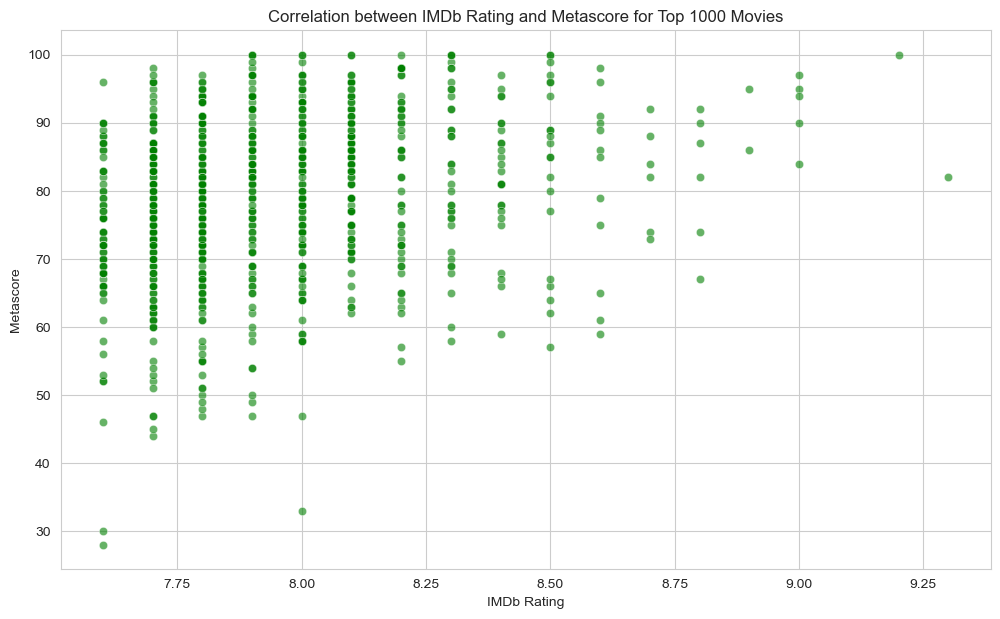

In [22]:
# Plotting the correlation between IMDb Rating and Metascore
plt.figure(figsize=(12, 7))
sns.scatterplot(x=movies_df['IMDb Rating'], y=movies_df['Metascore'], alpha=0.6, color='green')
plt.title('Correlation between IMDb Rating and Metascore for Top 1000 Movies')
plt.xlabel('IMDb Rating')
plt.ylabel('Metascore')
plt.show()


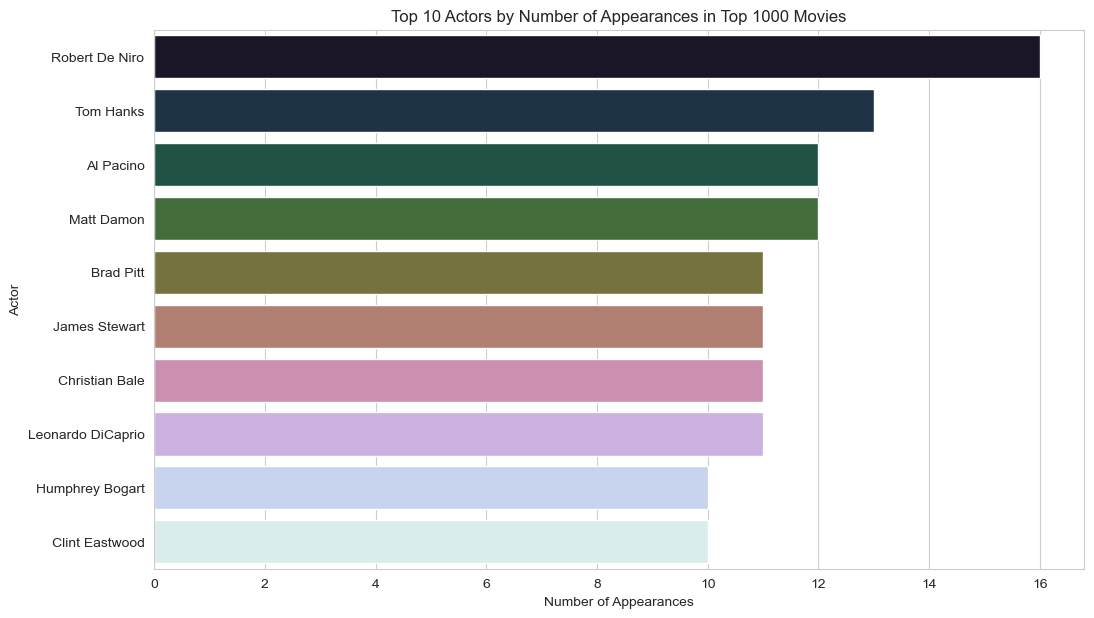

In [23]:
# Splitting the 'Stars' column to get individual actors and counting their appearances
actor_list = movies_df['Stars'].str.split(', ').sum()
top_actors = pd.Series(actor_list).value_counts().head(10)

# Plotting the top actors by number of appearances
plt.figure(figsize=(12, 7))
sns.barplot(x=top_actors.values, y=top_actors.index, palette="cubehelix")
plt.title('Top 10 Actors by Number of Appearances in Top 1000 Movies')
plt.xlabel('Number of Appearances')
plt.ylabel('Actor')
plt.show()


Here's a summary of our analysis on the top 1000 movies based on the provided dataset:

1. **IMDb Ratings Distribution**: Most movies in the top 1000 list have ratings between 7.5 and 8.5, indicating a consistent standard of quality. Very few movies achieve ratings above 9, making them exceptional.

2. **Top Directors**: There are directors who have multiple entries in the top 1000 list, showcasing their ability to consistently produce quality films. 

3. **Earnings vs. IMDb Rating**: While there's a general positive correlation, higher IMDb ratings don't always guarantee higher box office earnings. This emphasizes the distinction between critical acclaim and commercial success.

4. **Movies per Year**: More recent years have seen a higher number of top-rated movies, possibly due to increased movie production, changes in audience preferences, or the sheer volume of movies being made.

5. **Correlation between IMDb Rating and Metascore**: There's a positive correlation, suggesting that movies with higher IMDb ratings typically also have higher Metascores. However, exceptions exist, highlighting that different rating systems might prioritize different aspects of a movie.

6. **Top Actors by Appearances**: Certain actors appear frequently in the top 1000 list, indicating their consistent involvement in high-quality films.

7. **Distribution of Votes**: Most movies in the top 1000 list have votes in the lower range, with only a few achieving very high numbers of votes. This suggests that even among top-rated movies, only a subset receives widespread attention or viewership.

8. **Gross Earnings Over Time**: There's a clear trend of increasing gross earnings over the years, suggesting a growing commercial success of movies or perhaps reflecting rising ticket prices and broader global distribution.

9. **Directors with Highest Average IMDb Rating**: Among directors with more than one movie in the list, some consistently achieve high IMDb ratings, emphasizing their ability to maintain a high standard across their filmography.

10. **Votes and IMDb Rating**: The relationship between votes and IMDb rating was not explicitly visualized in our analysis, but it's an important aspect to consider, as movies with higher engagement (in terms of votes) might influence the perceived quality or popularity of a movie.

**Overall Conclusion**:
The film industry has seen a plethora of movies that have achieved both commercial success and critical acclaim. While there are clear standout directors and actors who consistently deliver top-quality films, the relationship between earnings, ratings, and votes is complex. The growing number of top-rated movies in recent years showcases the evolving landscape of cinema, with more films reaching audiences and receiving recognition. However, it's also evident that critical acclaim (as measured by ratings) doesn't always align with commercial success (as indicated by gross earnings), suggesting a multifaceted nature of success in the film industry.